In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from src.utils.detect_outlier import analyze_outliers, interpolate_outliers
from src.visualization.outlier_visualization import visualize_outliers, visualize_interpolation

2024-12-24 00:21:52.679 | INFO     | src.config:<module>:11 - PROJ_ROOT path is: D:\protofolio_projects\egy_exchange_rate_forcasting


In [2]:
exchange_rate = pd.read_csv("../data/raw/USD2EGP.csv")
exchange_rate
# Convert to datetime if not already datetime
exchange_rate['Date'] = pd.to_datetime(exchange_rate['Date'])

# Method 1: Using dt.normalize()
exchange_rate['Date'] = exchange_rate['Date'].dt.normalize()

In [3]:
exchange_rate

,Date,EGP=X
0,2022-11-09,24.318237
1,2022-11-10,24.357000
2,2022-11-11,24.367001
3,2022-11-14,24.425974
4,2022-11-15,24.423300
...,...,...
678,2024-11-14,49.325381
679,2024-11-16,49.296856
680,2024-11-17,49.296856
681,2024-11-18,49.450179


In [4]:
exchange_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    683 non-null    datetime64[ns]
 1   EGP=X   683 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 10.8 KB


In [5]:
exchange_rate.sample(10)

,Date,EGP=X
308,2023-10-10,30.951901
372,2023-12-14,30.902602
255,2023-08-18,30.907198
79,2023-02-14,30.574458
558,2024-06-20,47.715103
579,2024-07-12,48.004397
359,2023-11-30,30.897797
98,2023-03-08,30.780799
488,2024-04-09,47.557503
649,2024-09-21,48.452557


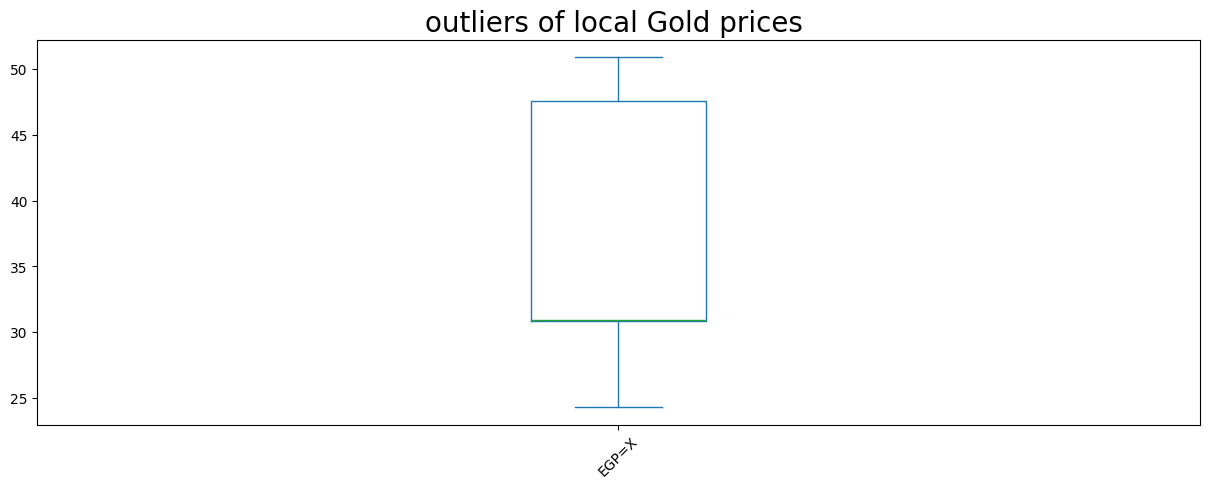

In [6]:
exchange_rate[['EGP=X']].plot(kind='box',figsize=(15,5),)
plt.title("outliers of local Gold prices ", fontsize=20)
plt.xticks(rotation = 45);
graph_file = 'outliers of local Gold prices.png'
plt.savefig(graph_file)
plt.show()

In [7]:
global_outliers_indices, local_outliers_indices, _ = analyze_outliers(exchange_rate['EGP=X'])

Global outliers found: 0
Local outliers found: 14
Combined outliers found: 14


In [8]:
exchange_rate[['EGP=X']].iloc[local_outliers_indices,:]


,EGP=X
13,24.622240
121,30.710508
187,30.948982
270,31.038759
292,30.789994
327,30.831325
355,30.797680
395,30.675640
432,30.798905
437,30.778938


In [12]:
visualize_outliers(exchange_rate['EGP=X'], exchange_rate['Date'])

There are no outliers in the data

In [10]:
# exchange_rate['EGP=X'], _  = interpolate_outliers(exchange_rate['EGP=X'], method='spline')

In [11]:
exchange_rate.to_pickle('../data/processed/exchange_rate.pkl')